In [ ]:
import numpy as np
import tensorflow as tf
import time
from PIL import Image as PILImage
import matplotlib.pyplot as plt

In [1]:
try:
    import tensorflow as tf
    print("\nTensorflow is installed.")
except ImportError as e:
    print("Tensorflow not installed, please install it using 'pip install tensorflow.")
    pass


Tensorflow is installed.


#### Compute the element-wise product of two vectors using Tensorflow


In [ ]:

size = (50000,)
u = tf.random.uniform(size)
v = tf.random.uniform(size)

start_time = time.perf_counter()
tf.math.multiply(u, v)
end_time = time.perf_counter()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

Execution time: 0.005423500027973205 seconds


#### Compute the element-wise product of two vectors using a for loop

In [ ]:

size = (5000,)
pre_a = np.zeros(size)
pre_b = np.zeros(size)

a = np.random.uniform(pre_a)
b = np.random.uniform(pre_b)

start_time = time.perf_counter()
result = np.zeros(size)

for i in range(size[0]):
    result= a[i]*b[i]

end_time = time.perf_counter()
execution_time=end_time-start_time

print(f"Execution time: {execution_time} seconds")


Execution time: 0.0014513000496663153 seconds


We can see that using Tensorflow the operation is faster around 4 x 10^-3 seconds.

#### define 2x2 matrics A and B and compute AB+3B

In [ ]:

A = tf.constant([[1,2],[3,4]])
B = tf.constant([[4,1],[5,2]])

#AB
AB = tf.matmul(A,B)
#3B
ThreeB = tf.scalar_mul(3, B)
#AB+3B
final = tf.add(AB, ThreeB)
print(np.array(final))


[[26  8]
 [47 17]]


In [5]:
print(A[0,1])

tf.Tensor(2, shape=(), dtype=int32)


the value in first row and 2nd column of A is 2. we put 0 first for row, because 0 is the first index and represent row 1 and 1 for column which is 2nd index or column 2

#### its convenient to convert tensor objects to NumPy arrays and vice versa

In [25]:
print(A.numpy()) # convert tensor to numpy array

A_r1 = A.numpy()[0] # first row of A as numpy array
A_r1 = tf.constant(A_r1) # convert numpy array to tensor

print(A_r1) # convert numpy array to tensor 


[[1 2]
 [3 4]]
tf.Tensor([1 2], shape=(2,), dtype=int32)


In [26]:
print(B.numpy())

[[4 1]
 [5 2]]


## MNIST Dataset

#### load the MNIST dataset, it contains 70,000 samples of handwritten digits. 

In [38]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data() # load dataset and split into training and testing sets

#### Display the first image. Use Python and the `train_labels` to print a message stating the digit in the image.

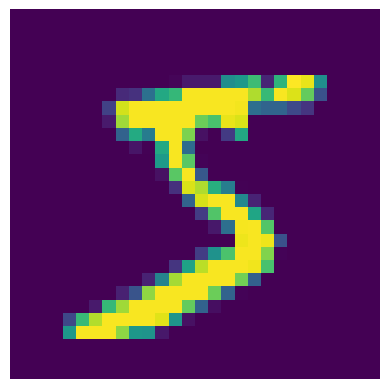

5


In [ ]:

#display first image
image1 = np.array(train_images[0])
plt.imshow(image1)
plt.axis('off')
plt.show()

#print the message
print(train_labels[0])
#it's 5

### Preparing the Data

Some Observations:
- there are 2^32 = 4,294,967,296  floating point numbers in a 32-bit system.  
- while in normalized 32-bit system there are 2^32-2^24 ~ 4.28 billion numbers.   
- decimal precision of a 32-bit system is approximately 7 decimal digits. (24 total bits * (log10(2)~ 0.301) ~ 7.22) example: 123.4567
- decimal precision of a 32-bit floating point number in the range $0$ to $1$ is also about 7 decimal digits. (because in ormalized form we still have 24 bits) example: 0.1234567  

#### Normalize the training and testing datasets to reshape the images to be arrays of size `(784,)`.

In [41]:

train_images = tf.reshape(train_images / 255.0, (-1, 784))
test_images = tf.reshape(test_images / 255.0, (-1, 784))


#### Convert the training and testing labels to categorical data.

In [44]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
#print(train_labels.shape)
#print(test_labels.shape)

### Initializing and Training Our Model
Defining a feedforward neural network using Tensorflow 

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\shagh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### specify our loss function and *optimizer*

In [46]:
loss_function = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy']) # initialize model weights and compile model


#### Apply the model to the training data 

In [ ]:
pred_lables = model(train_images)
loss_function(train_labels, pred_lables)

<tf.Tensor: shape=(60000,), dtype=float32, numpy=
array([0.08998682, 0.08997376, 0.08997457, ..., 0.08997384, 0.09000552,
       0.09002867], dtype=float32)>

#### Now let's train our model:

In [48]:
model.fit(train_images,
          train_labels, 
          epochs=5, 
          batch_size=32) # train model on training data for 5 epochs with batch size of 32

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1277 - loss: 0.0900
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1118 - loss: 0.0900
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1113 - loss: 0.0900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1133 - loss: 0.0900
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1123 - loss: 0.0900


#### Load the Fashion MNIST dataset & Display the first 5 images and print their labels.


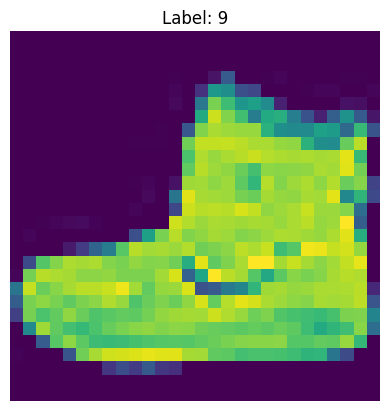

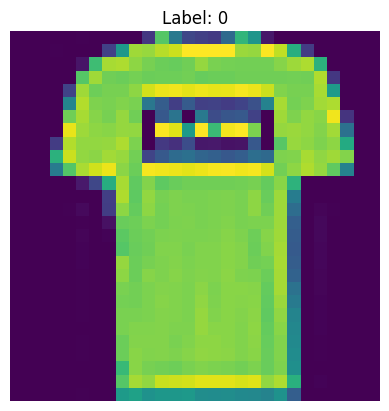

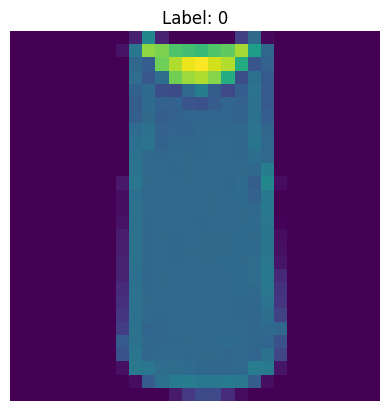

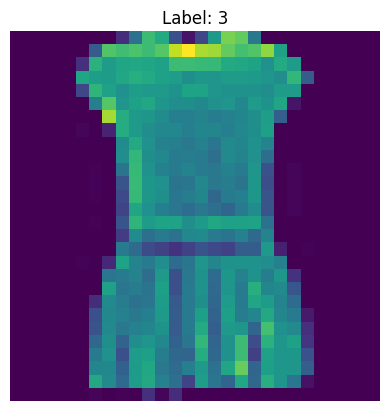

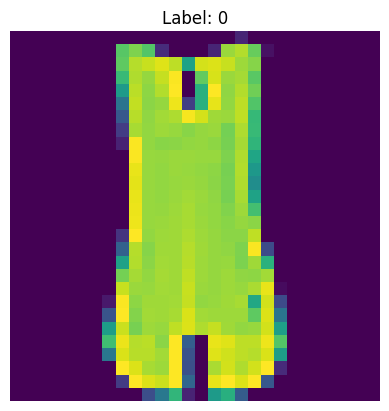

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


#display first 5 images and their lables
for i in range(5):
    image = np.array(train_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {train_labels[i]}")
    plt.show()


#### Prepare the training and testing data: normalize and reshape the images and convert the labels to categorical data. Then define and train a model with $784\times 128\times 64\times 32\times 10$ architecture 
Have the ReLU activation function in every layer except the last. For the final layer, use softmax for the activation function. Use stochastic gradient descent to train the model and mean squared error for its loss function. Train until your model has at least $90\%$ accuracy on the training data. 

In [ ]:
train_images = tf.reshape(train_images/255.0,(-1, 784))
print(train_images.shape)

train_labels = tf.keras.utils.to_categorical(train_labels)
print(train_labels.shape)

(60000, 784)
(60000, 10)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

loss_function = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy']) # initialize model weights and compile model

C:\Users\shagh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
pred_lables = model(train_images)
loss_function(train_labels, pred_lables)
model.fit(train_images,
          train_labels, 
          epochs=300, 
          batch_size=64)

Epoch 1/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.0165
Epoch 2/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8916 - loss: 0.0162
Epoch 3/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8917 - loss: 0.0165
Epoch 4/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8913 - loss: 0.0164
Epoch 5/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8926 - loss: 0.0162
Epoch 6/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8918 - loss: 0.0163
Epoch 7/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8923 - loss: 0.0162
Epoch 8/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8932 - loss: 0.0161
Epoch 9/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8922 - loss: 0.0162
Epoch 10/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8925 - loss: 0.0163
Epoch 11/300
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8955 - loss: 0.0159
Epoch 12/300
938/938 ━━━━━━━━━━━━━━━━━━━━

the accuracy: 92.31%